# Save and reload a fit configuration

In [1]:
import orsa
import numpy as np
import seaborn as sns
import matplotlib as mpl

print(orsa.__version__)

0.8.5


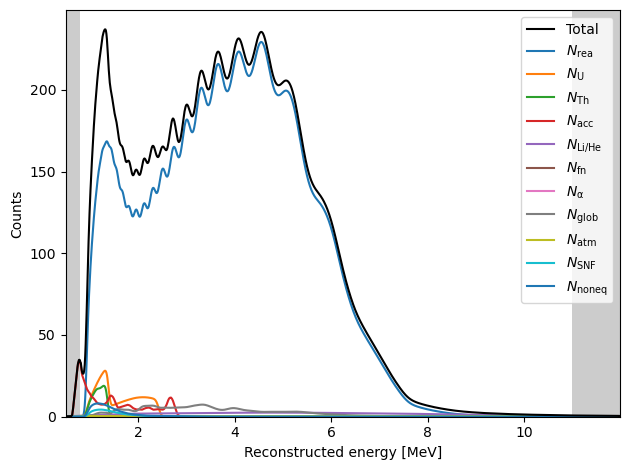

In [2]:
model = orsa.model.read_json('inputs/test_model.json')
model.exposure = 6*365.25
data = model.get_spectrum(asimov = True)
model

In [3]:
model.use_shape_uncertainty = False
cf = orsa.probability.CostFunction(ll=orsa.probability.ll_binned, model=model, data=data, ll_args = dict())
res = orsa.fit.minuit(cf)
round(res.obj.fval, 5)

Cost function parsed as LogLikelihood-like


5975.57561

In [4]:
res.to_json('inputs/test_conf.json')

In [5]:
res_load = orsa.fit.read_json('inputs/test_conf.json')

Getting priors from models (WIP on custom priors)


In [6]:
res_reload = orsa.fit.minuit(res_load.cost_function)
round(res_reload.obj.fval, 5)

Cost function parsed as LogLikelihood-like


5975.57561